In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
#standarizing the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
scaled_features=sc.transform(df.drop('TARGET CLASS',axis=1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [17]:
features=pd.DataFrame(scaled_features,columns=df.columns[:-1])
print((features))

          WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0   -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1   -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2   -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3    0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4    1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.211653 -0.312490  0.065163 -0.259834  0.017567 -1.395721 -0.849486   
996 -1.292453 -0.616901  0.369613  0.482648  1.569891  1.273495  0.362784   
997  0.641777 -0.513083 -0.179205  1.022255 -0.539703 -0.229680 -2.261339   
998  0.467072 -0.982786 -1.465194 -0.071465  2.368666  0.001269 -0.422041   
999 -0.387654 -0.595894 -1.431398  0.512722 -0.402552 -2.026512 -0.726253   

          PJF       HQE       NXJ  
0   -1.482368 -0.949719 -0.643314  
1  

In [26]:
#Train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,df['TARGET CLASS'],test_size=0.3)


In [35]:
xtest

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
774,1.532546,1.229684,-0.701210,0.195125,0.077688,-0.834154,-1.773022,0.198231,-0.674533,-0.109302
570,0.330461,-1.030505,-1.701751,-0.686152,-0.454081,-0.090452,-0.387464,-1.183099,0.131512,0.237269
993,-0.746120,-0.251663,-0.360088,0.738086,2.136036,0.042642,-1.937310,-0.726449,1.044144,-1.342160
871,0.311041,1.272512,0.794599,-1.086011,1.672471,1.644877,0.300014,0.601253,-0.195226,-0.393838
215,-0.630095,-1.232526,-1.231909,1.451816,-2.046997,0.162872,-1.753957,0.538187,0.508895,-0.905692
...,...,...,...,...,...,...,...,...,...,...
717,-1.324994,-0.436726,1.230455,-0.115890,0.011926,-0.898880,1.312631,0.061718,0.758603,1.039307
260,-0.578435,1.181690,-0.381243,-0.183263,0.612778,-0.623068,0.671258,1.069604,-0.598165,1.031106
40,0.350321,-2.120854,-0.959004,-0.842137,0.620755,-1.265013,0.010807,-1.123451,0.226403,-0.590999
64,1.628502,0.854675,0.011388,-0.983300,0.079763,-0.010238,-0.536043,-0.797364,0.501518,0.596119


In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [34]:
predict=knn.predict(xtest)
predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(confusion_matrix(ytest,predict))

[[119  15]
 [ 13 153]]


In [42]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       134
           1       0.91      0.92      0.92       166

    accuracy                           0.91       300
   macro avg       0.91      0.90      0.91       300
weighted avg       0.91      0.91      0.91       300



In [59]:
#choosing a k value
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,features,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

In [60]:
accuracy_rate

[0.9109999999999999,
 0.909,
 0.9280000000000002,
 0.9339999999999999,
 0.9289999999999999,
 0.929,
 0.9310000000000003,
 0.9340000000000002,
 0.9289999999999999,
 0.9350000000000002,
 0.9329999999999998,
 0.9350000000000002,
 0.937,
 0.9410000000000001,
 0.9390000000000001,
 0.9390000000000001,
 0.9349999999999999,
 0.9360000000000002,
 0.9360000000000002,
 0.9360000000000002,
 0.9339999999999999,
 0.9359999999999999,
 0.93,
 0.933,
 0.9349999999999999,
 0.937,
 0.9380000000000001,
 0.938,
 0.937,
 0.9390000000000001,
 0.9360000000000002,
 0.943,
 0.937,
 0.9390000000000001,
 0.9390000000000001,
 0.9400000000000001,
 0.9369999999999999,
 0.943,
 0.9410000000000001]

Text(0, 0.5, 'Error Rate')

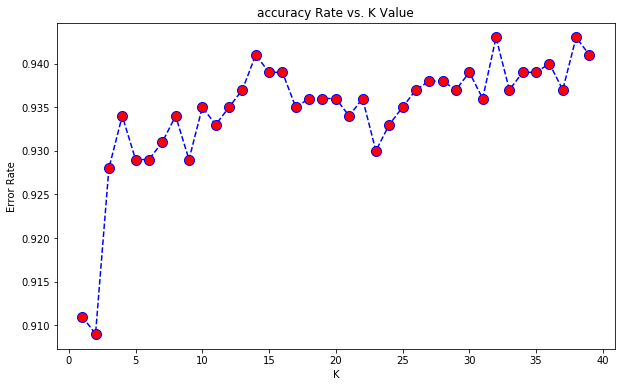

In [67]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [68]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,features,df['TARGET CLASS'],cv=10)
    error_rate.append(1-score.mean())
error_rate

[0.08900000000000008,
 0.09099999999999997,
 0.07199999999999984,
 0.06600000000000006,
 0.07100000000000006,
 0.07099999999999995,
 0.06899999999999973,
 0.06599999999999984,
 0.07100000000000006,
 0.06499999999999984,
 0.06700000000000017,
 0.06499999999999984,
 0.06299999999999994,
 0.05899999999999994,
 0.06099999999999994,
 0.06099999999999994,
 0.06500000000000006,
 0.06399999999999983,
 0.06399999999999983,
 0.06399999999999983,
 0.06600000000000006,
 0.06400000000000006,
 0.06999999999999995,
 0.06699999999999995,
 0.06500000000000006,
 0.06299999999999994,
 0.061999999999999944,
 0.062000000000000055,
 0.06299999999999994,
 0.06099999999999994,
 0.06399999999999983,
 0.05700000000000005,
 0.06299999999999994,
 0.06099999999999994,
 0.06099999999999994,
 0.05999999999999994,
 0.06300000000000006,
 0.05700000000000005,
 0.05899999999999994]

Text(0, 0.5, 'Error Rate')

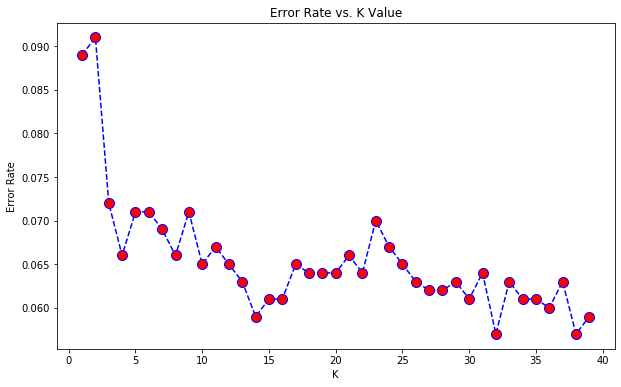

In [69]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [72]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(xtrain,ytrain)
pred = knn.predict(xtest)

print('WITH K=1')
print('\n')
print(confusion_matrix(ytest,predict))
print('\n')
print(classification_report(ytest,predict))

WITH K=1


[[119  15]
 [ 13 153]]


              precision    recall  f1-score   support

           0       0.90      0.89      0.89       134
           1       0.91      0.92      0.92       166

    accuracy                           0.91       300
   macro avg       0.91      0.90      0.91       300
weighted avg       0.91      0.91      0.91       300



In [75]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(xtrain,ytrain)
pred = knn.predict(xtest)

print('WITH K=23')
print('\n')
print(confusion_matrix(ytest,predict))
print('\n')
print(classification_report(ytest,predict))

WITH K=23


[[119  15]
 [ 13 153]]


              precision    recall  f1-score   support

           0       0.90      0.89      0.89       134
           1       0.91      0.92      0.92       166

    accuracy                           0.91       300
   macro avg       0.91      0.90      0.91       300
weighted avg       0.91      0.91      0.91       300

